# Observation non-add: Simulations and Figures 

This notebook contains the code to run the simulations and to create the figures in the paper: "Stressor interactions at the community level: explaining qualitative mismatches between observations" by James A. Orr, Jeremy J. Piggott, Andrew L. Jackson, Michelle C. Jackson and Jean-François Arnoldi.

Code runs for Python 3.9.7 (June 2022). 

### Contents  <a class="anchor" id="1"></a>
* [Figure 2 - Emperical Data](#2)
* [Generic model](#3)
* [Figure 3 - Linear Functions](#4)
* [Figure 4 - Diversity](#5)
* [Figure 5 - Biomass-Diversity](#6)
* [Figure 5 - Reproducing empirical results](#7)
* [Sup Figure - Visualising diversity](#8)

### Packages and Functions 

In [5]:
from platform import python_version
python_version()

'3.9.7'

In [6]:
######## General use #############
import numpy as np      
import matplotlib.pyplot as plt                                         
import pandas as pd                                                

####### Specific functions ########
from matplotlib.colors import ListedColormap, LinearSegmentedColormap   # For colour gradients
from numpy.linalg import norm  

####### User-defined functions ########
# Hill diversity
def hill(biomass, hill_n):
    q = hill_n
    positives = np.where(biomass > 1e-10)
    p = biomass[positives]/sum(biomass[positives])
    return np.power(norm(p, q), q/(1.-q))

# Do a and b have the same sign?
def is_mismatched(a,b): 
    if np.sign(a) == np.sign(b):
        return 0 
    else: 
        return 1

####### Colours ########
j_blue = (68/255, 114/255, 255/255)
blue_grad = ["white", j_blue]
blue_cmap = LinearSegmentedColormap.from_list("mycmap", blue_grad)
red_grad = ["white", "red"]
red_cmap = LinearSegmentedColormap.from_list("mycmap", red_grad)
 

<br>
<br>

## Figure 2 - Emperical Data  <a class="anchor" id="2"></a>
[Top](#1)

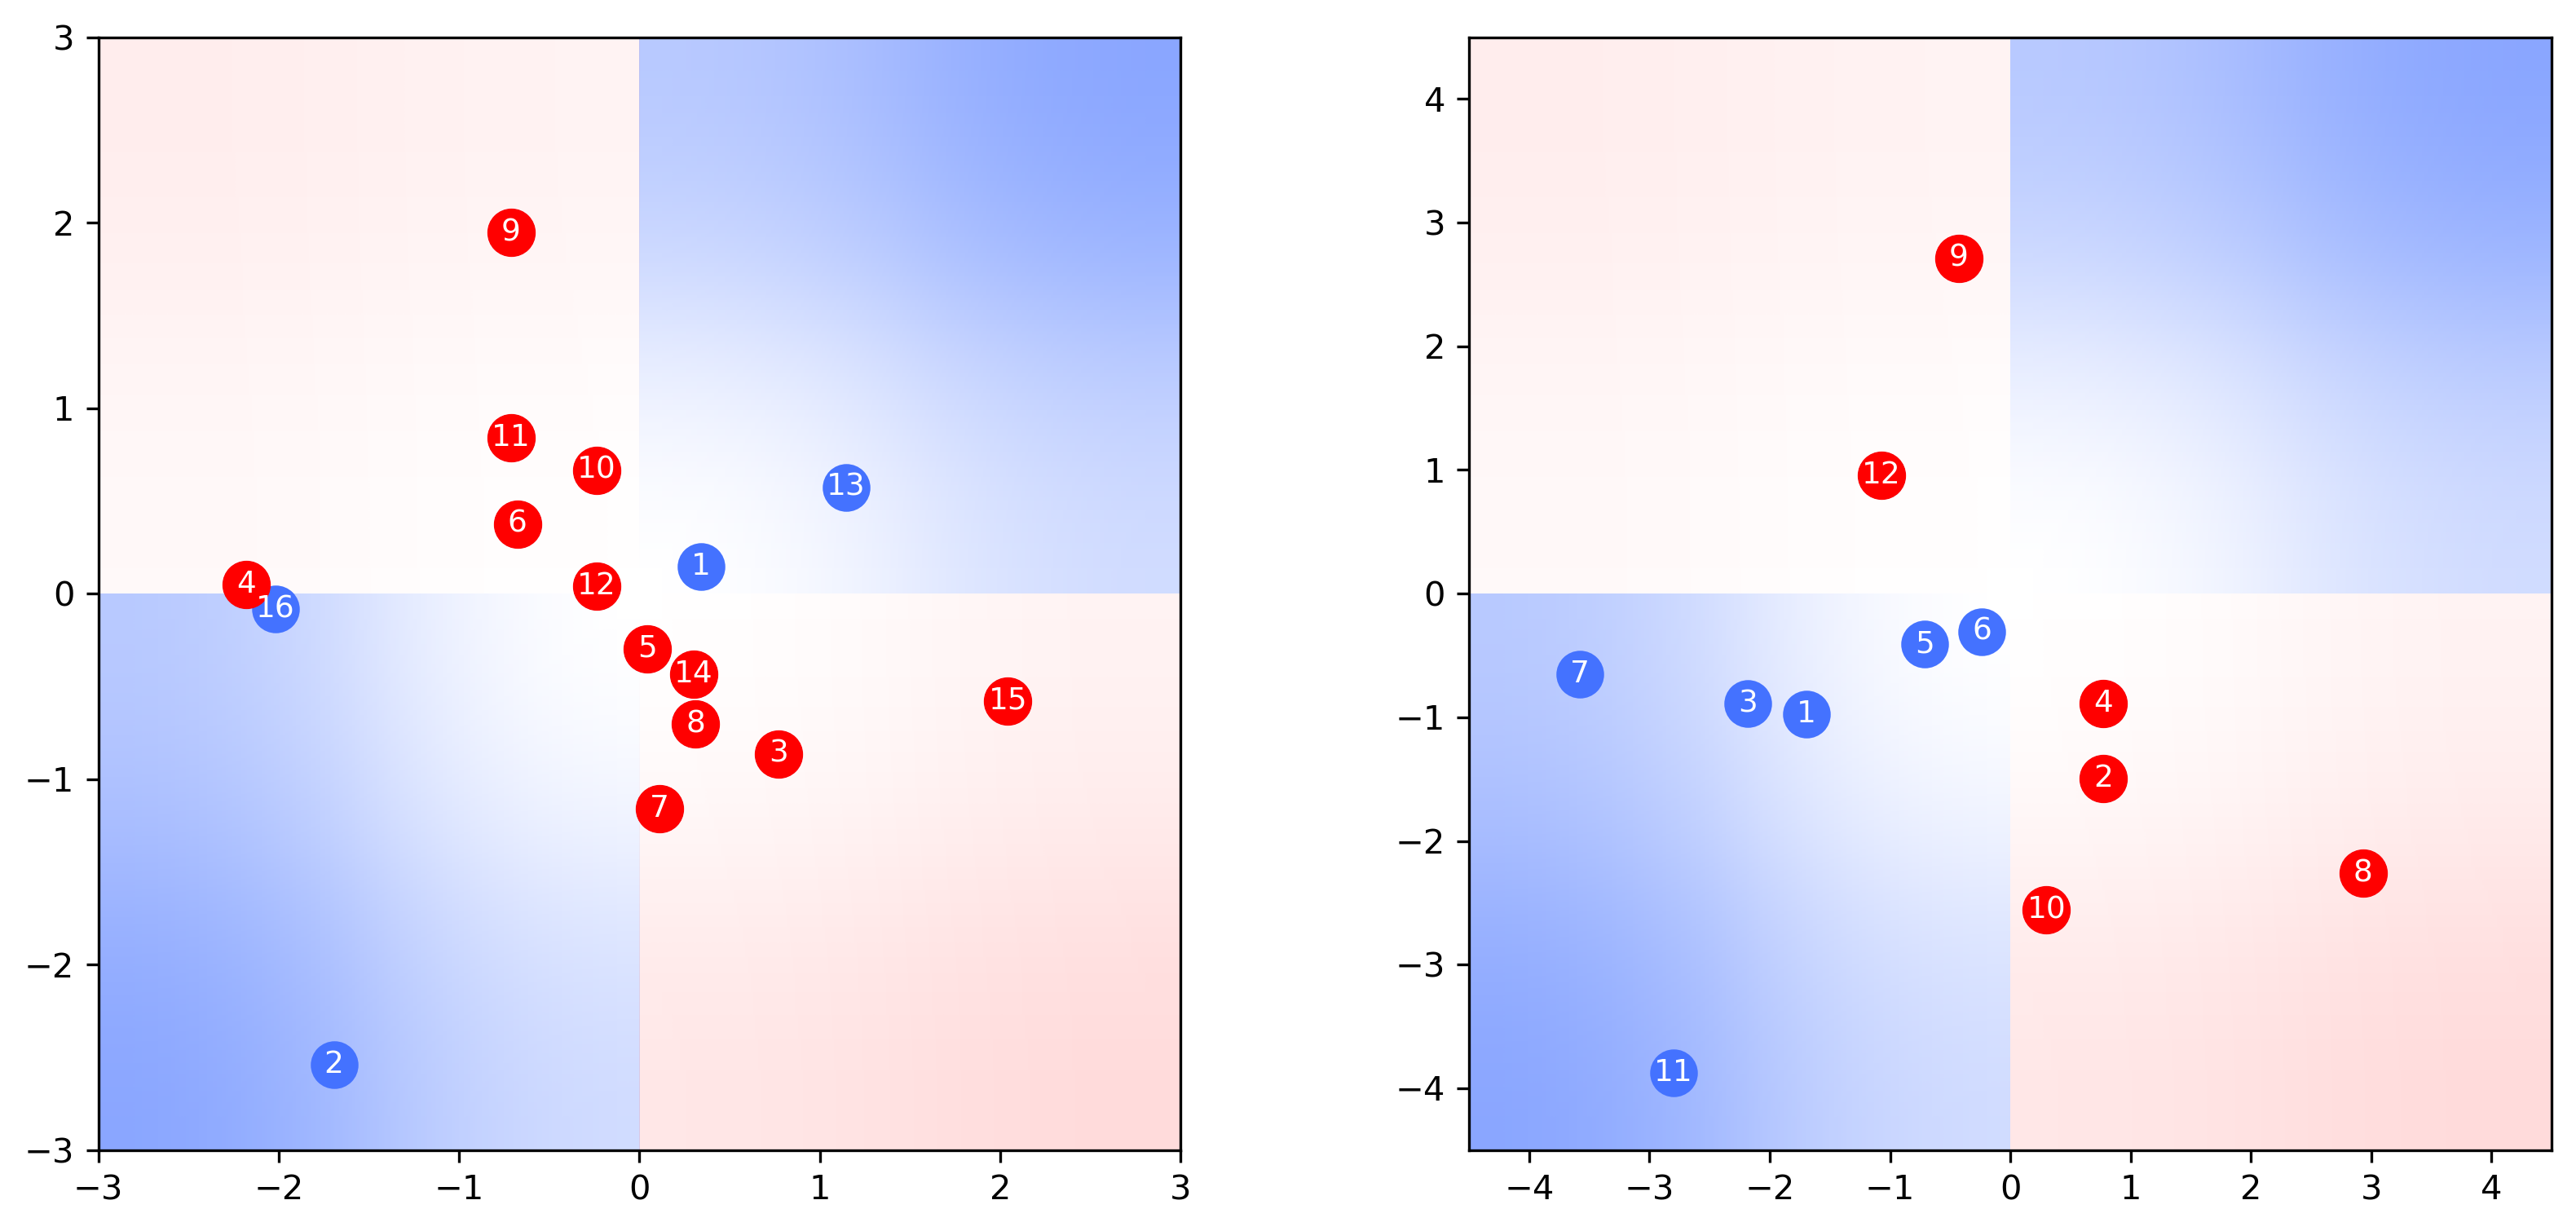

In [7]:
# Read in the empirical data 
empirical_biodiv = pd.read_csv("empirical data/biomass_diversity.csv")
empirical_biodec = pd.read_csv("empirical data/biomass_decomposition.csv")


# Create figure 
plt.figure(num=None, figsize=(12, 6.5), dpi=300, facecolor='w', edgecolor='k')


# Biomass v Diversity
plt.subplot(1, 2, 1) 
Max_X = 3
Max_Y = 3

plt.scatter(empirical_biodiv['HedgesdAdditive_X'], empirical_biodiv['HedgesdAdditive_Y'],
           s=170, color=j_blue)
reds = np.where(empirical_biodiv['quad'] == "MISMATCH")[0]
plt.scatter(empirical_biodiv['HedgesdAdditive_X'][reds], empirical_biodiv['HedgesdAdditive_Y'][reds],
           s=175, color="red")
plt.xlim(-Max_X, Max_X)
plt.ylim(-Max_X, Max_X)
annotations = empirical_biodiv['label']
for i, label in enumerate(annotations):
    plt.annotate(label, (empirical_biodiv['HedgesdAdditive_X'][i], empirical_biodiv['HedgesdAdditive_Y'][i]),
                ha='center', va='center', color="white", fontsize=9)

plt.imshow([[1.,1.], [0.,0.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.5,
            extent = (0, Max_X, 0, Max_Y))   
plt.imshow([[0.,1.], [0.,1.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.25,
            extent = (0, Max_X, 0, Max_Y))      
plt.imshow([[0.,1.], [0.,1.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.5,
            extent = (0, -Max_X, 0, -Max_Y))   
plt.imshow([[1.,1.], [0.,0.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.25,
            extent = (0, -Max_X, 0, -Max_Y)) 
plt.imshow([[1.,1.], [0.,0.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.1,
            extent = (0, Max_X, 0, -Max_Y)) 
plt.imshow([[0.,1.], [0.,1.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.05,
            extent = (0, Max_X, 0, -Max_Y)) 
plt.imshow([[1.,1.], [0.,0.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.05,
            extent = (0, -Max_X, 0, Max_Y)) 
plt.imshow([[0.,1.], [0.,1.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.025,
            extent = (0, -Max_X, 0, Max_Y))  
    

    

# Biomass v Decomposition
plt.subplot(1, 2, 2) 
Max_X = 4.5
Max_Y = 4.5


plt.scatter(empirical_biodec['HedgesdAdditive_X'], empirical_biodec['HedgesdAdditive_Y'],
           s=170, color=j_blue)
reds = np.where(empirical_biodec['quad'] == "MISMATCH")[0]
plt.scatter(empirical_biodec['HedgesdAdditive_X'][reds], empirical_biodec['HedgesdAdditive_Y'][reds],
           s=175, color="red")
plt.xlim(-Max_X, Max_X)
plt.ylim(-Max_X, Max_X)
annotations = empirical_biodec['label']

for i, label in enumerate(annotations):
    plt.annotate(label, (empirical_biodec['HedgesdAdditive_X'][i], empirical_biodec['HedgesdAdditive_Y'][i]),
                ha='center', va='center', color="white", fontsize=9)

  
    
    
plt.imshow([[1.,1.], [0.,0.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.5,
            extent = (0, Max_X, 0, Max_Y))   
plt.imshow([[0.,1.], [0.,1.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.25,
            extent = (0, Max_X, 0, Max_Y))      
plt.imshow([[0.,1.], [0.,1.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.5,
            extent = (0, -Max_X, 0, -Max_Y))   
plt.imshow([[1.,1.], [0.,0.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.25,
            extent = (0, -Max_X, 0, -Max_Y)) 
plt.imshow([[1.,1.], [0.,0.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.1,
            extent = (0, Max_X, 0, -Max_Y)) 
plt.imshow([[0.,1.], [0.,1.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.05,
            extent = (0, Max_X, 0, -Max_Y)) 
plt.imshow([[1.,1.], [0.,0.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.05,
            extent = (0, -Max_X, 0, Max_Y)) 
plt.imshow([[0.,1.], [0.,1.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.025,
            extent = (0, -Max_X, 0, Max_Y))  

plt.tight_layout(pad=6);

<br>
<br>
<br>
<br>

## Generic model  <a class="anchor" id="3"></a>
[Top](#1)

In [8]:
### Function to generate communities, stressors and to observe non-additivity at community level

#    S               = Number of species
#    num_funs        = Number of function pairs (and communities) - points on the plots
#    num_exp         = Number of experiments for each function pair - where the "proportion" comes from
#    sI_d            = Average stressor direction
#    sI_i            = Upper limit of stressor intensity
#    nonadd_d        = Average non-additivity (bias)
#    nonadd_i        = Upper limit of non-additivity intensity
#    alpha           = Scaling of non-additivity by biomass (from 0 to 1)  

##############################################################

def generic_model(num_funs, num_exp, S, sI_d, sI_i, nonadd_d, nonadd_i, alpha_low, alpha_high):
    
    # vectors to fill in 
    ff_prediction = np.zeros(num_funs)
    ff_prediction_div = np.zeros(num_funs)
    dd_prediction = np.zeros(num_funs)
    bd_prediction = np.zeros(num_funs)
    ff_realised = np.zeros(num_funs)
    dd_realised = np.zeros(num_funs)
    bd_realised = np.zeros(num_funs)
    bias = np.zeros(num_funs)
    q_diff = np.zeros(num_funs)
    Unevenness = np.zeros(num_funs)
    diversity = np.zeros(num_funs)
    scaling = np.zeros(num_funs)
    ff_Theta = np.zeros(num_funs)
    ff_Theta_pred = np.zeros(num_funs)

    # Loop to create many different communities and functions
    for n in range(num_funs):

        # generate community 
        zeta = np.random.uniform(0.5, 2.5)      # unevenness
        Unevenness[n] = zeta
        K = np.exp(np.random.normal(0, zeta, size=S))    
        Nf = np.maximum(K, 0)
        diversity[n] = hill(Nf, 2)             # initial diversity
        
        # Generate a value of alpha, that controls how much non-addd is scaled by K 
        alpha = np.random.uniform(alpha_low, alpha_high)
        scaling[n] = alpha

        ######### 1) Linear function ###########
        
        # generate functions
        narrowness_1 = np.random.uniform(0, 1.3)
        narrowness_2 = np.random.uniform(0, 1.3)
        function_1 = np.exp(np.random.normal(0, narrowness_1, size=S))            
        function_2 = np.exp(np.random.normal(0, narrowness_2, size=S)) 

        # functions scaled by K^alpha
        function_1_mod = (K**alpha) * function_1
        function_2_mod = (K**alpha) * function_2

        # measure (or predict) angle between functions (in radians)
        ff_cos_theta = np.dot(function_1_mod, function_2_mod) / (norm(function_1_mod) * norm(function_2_mod))
        ff_theta = np.arccos(ff_cos_theta)                                                        
        ff_predicted_cos_theta = (np.sqrt(hill(function_1, 2) * hill(function_2, 2)))/S              # Cos theta predicted using diversity of functions (best when non-add is independent of K)
        ff_predicted_theta = np.arccos(ff_predicted_cos_theta)

        # prediction of mismatches based on actual (or predicted) angle between function
        ff_prediction[n] = ff_theta/np.pi                                          
        ff_prediction_div[n] = ff_predicted_theta/np.pi     
        
        # store cos and predicted cos 
        ff_Theta[n] = ff_theta
        ff_Theta_pred[n] = ff_predicted_theta

        
        ######### 2) Diversities ###########
        
        # generate diversity indices and their gradients 
        P = K/np.sum(K)  
        q1 = np.random.uniform(0.01, 5)
        q2 = np.random.uniform(0.01, 5)
        d_grad_1 = (np.power(P, q1-1) - np.sum(np.power(P, q1))) * (q1/(1-q1))
        d_grad_2 = (np.power(P, q2-1) - np.sum(np.power(P, q2))) * (q2/(1-q2))
        q_diff[n] = abs(q1-q2)

        # diversity gradients scaled by K^alpha
        d_grad_1_mod = (K**alpha) * d_grad_1
        d_grad_2_mod = (K**alpha) * d_grad_2

        # measure angle between diversity indices gradients (in radians)
        dd_cos_theta = np.dot(d_grad_1_mod, d_grad_2_mod) / (norm(d_grad_1_mod) * norm(d_grad_2_mod)) 
        dd_theta = np.arccos(dd_cos_theta)                                               

        # prediction of mismatches based on actual (or predicted) angle between diversity indices gradients
        dd_prediction[n] = dd_theta/np.pi 
    
        
        ######### 3) Biomass - Diversity ########## 
        
        # generate total biomass and gradient of a diversity index
        P = K/np.sum(K)  
        total = np.ones(S) 
        q = 2             # simpson's diversity
        d_grad = (np.power(P, q-1) - np.sum(np.power(P, q))) * (q/(1-q))

        total_mod = (K**alpha) * total
        d_grad_mod = (K**alpha) * d_grad

        # measure angle between diversity indices gradients
        bd_cos_theta = np.dot(d_grad_mod, total_mod) / (norm(d_grad_mod) * norm(total_mod))    # angle between diversity and total
        bd_theta = np.arccos(bd_cos_theta)                                                # measured in radians

        # prediction of mismatches based on actual (or predicted) angle between diversity indices gradients
        bd_prediction[n] = bd_theta/np.pi 
        

        # vectors to fill in during second loop
        ff_mismatch = np.zeros(num_exp)
        dd_mismatch = np.zeros(num_exp)
        bd_mismatch = np.zeros(num_exp)
        frac = np.zeros(num_exp)

        # Generate a bias for the vector of non-additivity at the population level
        nonadd_bias = np.random.uniform(-nonadd_d, nonadd_d)  

        # Loop to run stressor experiments for each community 
        for m in range(num_exp): 

            ########## Generate Stressors ##########

            # Stressor 1 
            s1 = np.random.normal(sI_d, 1, size=S)      # Draw stressor from a random normal distribution with a mean direction
            s1 = s1/norm(s1)                            # Normalise so that changing direction does not change intensity
            s1_int = np.random.uniform(0, sI_i)         # Intensity value to scale entire stressor vector by 
            s1 = s1 * s1_int * (K**alpha)               # Stressor multiplied by intensity and scaled by K^alpha
            s1 = s1 * np.sqrt(S)                        # Multiply by square root of S so intensity becomes a fraction of each species' K

            # Stressor 2 
            s2 = np.random.normal(sI_d, 1, size=S)                       
            s2 = s2/norm(s2)                            
            s2_int = np.random.uniform(0, sI_i)     
            s2 = s2 * s2_int * (K**alpha)              
            s2 = s2 * np.sqrt(S)

            # Non-additive term 
            nonadd = np.random.normal(nonadd_bias, 1, size = S) 
            nonadd = nonadd/norm(nonadd) 
            nonadd_int = np.random.uniform(0, nonadd_i) 
            nonadd = nonadd * nonadd_int * (K**alpha)     
            nonadd = nonadd * np.sqrt(S)

            # Combination 
            s12 = s1 + s2 + nonadd

            ########## Apply Stressors ##########       
            NS_1 = np.maximum((K - s1), 0)
            NS_2 = np.maximum((K - s2), 0)
            NS_12 = np.maximum((K - s12), 0)

            # Effect of stressors (at population level)
            DS_1 = NS_1 - Nf
            DS_2 = NS_2 - Nf
            DS_12 = NS_12 - Nf

            ########## Actual population non-additivity ##########
            pop_nonadd = DS_12 - (DS_1 + DS_2)   
            frac[m] = len(np.where(pop_nonadd<0)[0])/len(pop_nonadd)    # fraction of synergism - 0.5 would be unbiased 

            ######### 1) Linear function ###########
            syn_fun_1 = np.dot(function_1, pop_nonadd)            # non-additivity observed by function 1 - i.e. projecting vector of non-additivity onto function 1
            syn_fun_2 = np.dot(function_2, pop_nonadd)            # non-additivity observed by function 2 - i.e. projecting vector of non-additivity onto function 2
            
            ########## 2) Diversities #########     
            D_q1_1 = hill(NS_1, q1) - hill(Nf, q1)
            D_q1_2 = hill(NS_2, q1) - hill(Nf, q1)
            D_q1_12 = hill(NS_12, q1) - hill(Nf, q1)

            D_q2_1 = hill(NS_1, q2) - hill(Nf, q2)
            D_q2_2 = hill(NS_2, q2) - hill(Nf, q2)
            D_q2_12 = hill(NS_12, q2) - hill(Nf, q2)
            
            syn_D_q1 = D_q1_12 - (D_q1_1 + D_q1_2)                # non-additivity observed by diversity 1
            syn_D_q2 = D_q2_12 - (D_q2_1 + D_q2_2)                # non-additivity observed by diversity 2
            
            
            ########## 3) Diversity - Biomass #########   
            # Diversity      
            D_1 = hill(NS_1, q) - hill(Nf, q)
            D_2 = hill(NS_2, q) - hill(Nf, q)
            D_12 = hill(NS_12, q) - hill(Nf, q)
            syn_D = D_12 - (D_1 + D_2)                            # non-additivity observed by diversity

            # Total Biomass  
            T_1 = sum(NS_1) - sum(Nf) 
            T_2 = sum(NS_2) - sum(Nf) 
            T_12 = sum(NS_12) - sum(Nf) 
            syn_T = T_12 - (T_1 + T_2)                            # non-additivity observed by total biomass
            
            ########## Mismatches #########
            ff_mismatch[m] = is_mismatched(syn_fun_1, syn_fun_2)  # 1 is mismatch, 0 if same sign
            dd_mismatch[m] = is_mismatched(syn_D_q1, syn_D_q2)
            bd_mismatch[m] = is_mismatched(syn_T, syn_D)
            
        # Actual proportion of mismatches
        ff_realised[n] = np.sum(ff_mismatch)/len(ff_mismatch)    
        dd_realised[n] = np.sum(dd_mismatch)/len(dd_mismatch)
        bd_realised[n] = np.sum(bd_mismatch)/len(bd_mismatch)
        
        # Actual population-level consistency/bias
        bias[n] = abs(0.5 - np.mean(frac))                 

        if n%100==0:
            print(n)
    
    print("done")
        
    return ff_prediction, ff_prediction_div, dd_prediction, bd_prediction, ff_realised, dd_realised, bd_realised, bias, q_diff, Unevenness, diversity, scaling, ff_Theta, ff_Theta_pred

In [9]:
num_funs = 1000
num_exp = 500
S = 50                                                           

# Key parameters 
sI_d = 0           # stressor direction
sI_i = 0.1         # stressor intensity
nonadd_d = 0.3     # non-additivity bias
nonadd_i = 0.1     # non-additivity intensity
alpha_low = 0      # scaling (lower end of random normal for scaling non-add by biomass)
alpha_high = 0     # scaling (upper end of random normal for scaling non-add by biomass)

ff_prediction, ff_prediction_div, dd_prediction, bd_prediction, ff_realised, dd_realised, bd_realised, bias, q_diff, Unevenness, diversity, scaling, ff_Theta, ff_Theta_pred = generic_model(num_funs, num_exp, S, sI_d, sI_i, nonadd_d, nonadd_i, alpha_low, alpha_high)

0
100
200
300
400
500
600
700
800
900
done


<br>
<br>
<br>
<br>

## Figure 3 - Linear Functions  <a class="anchor" id="4"></a>
[Top](#1)

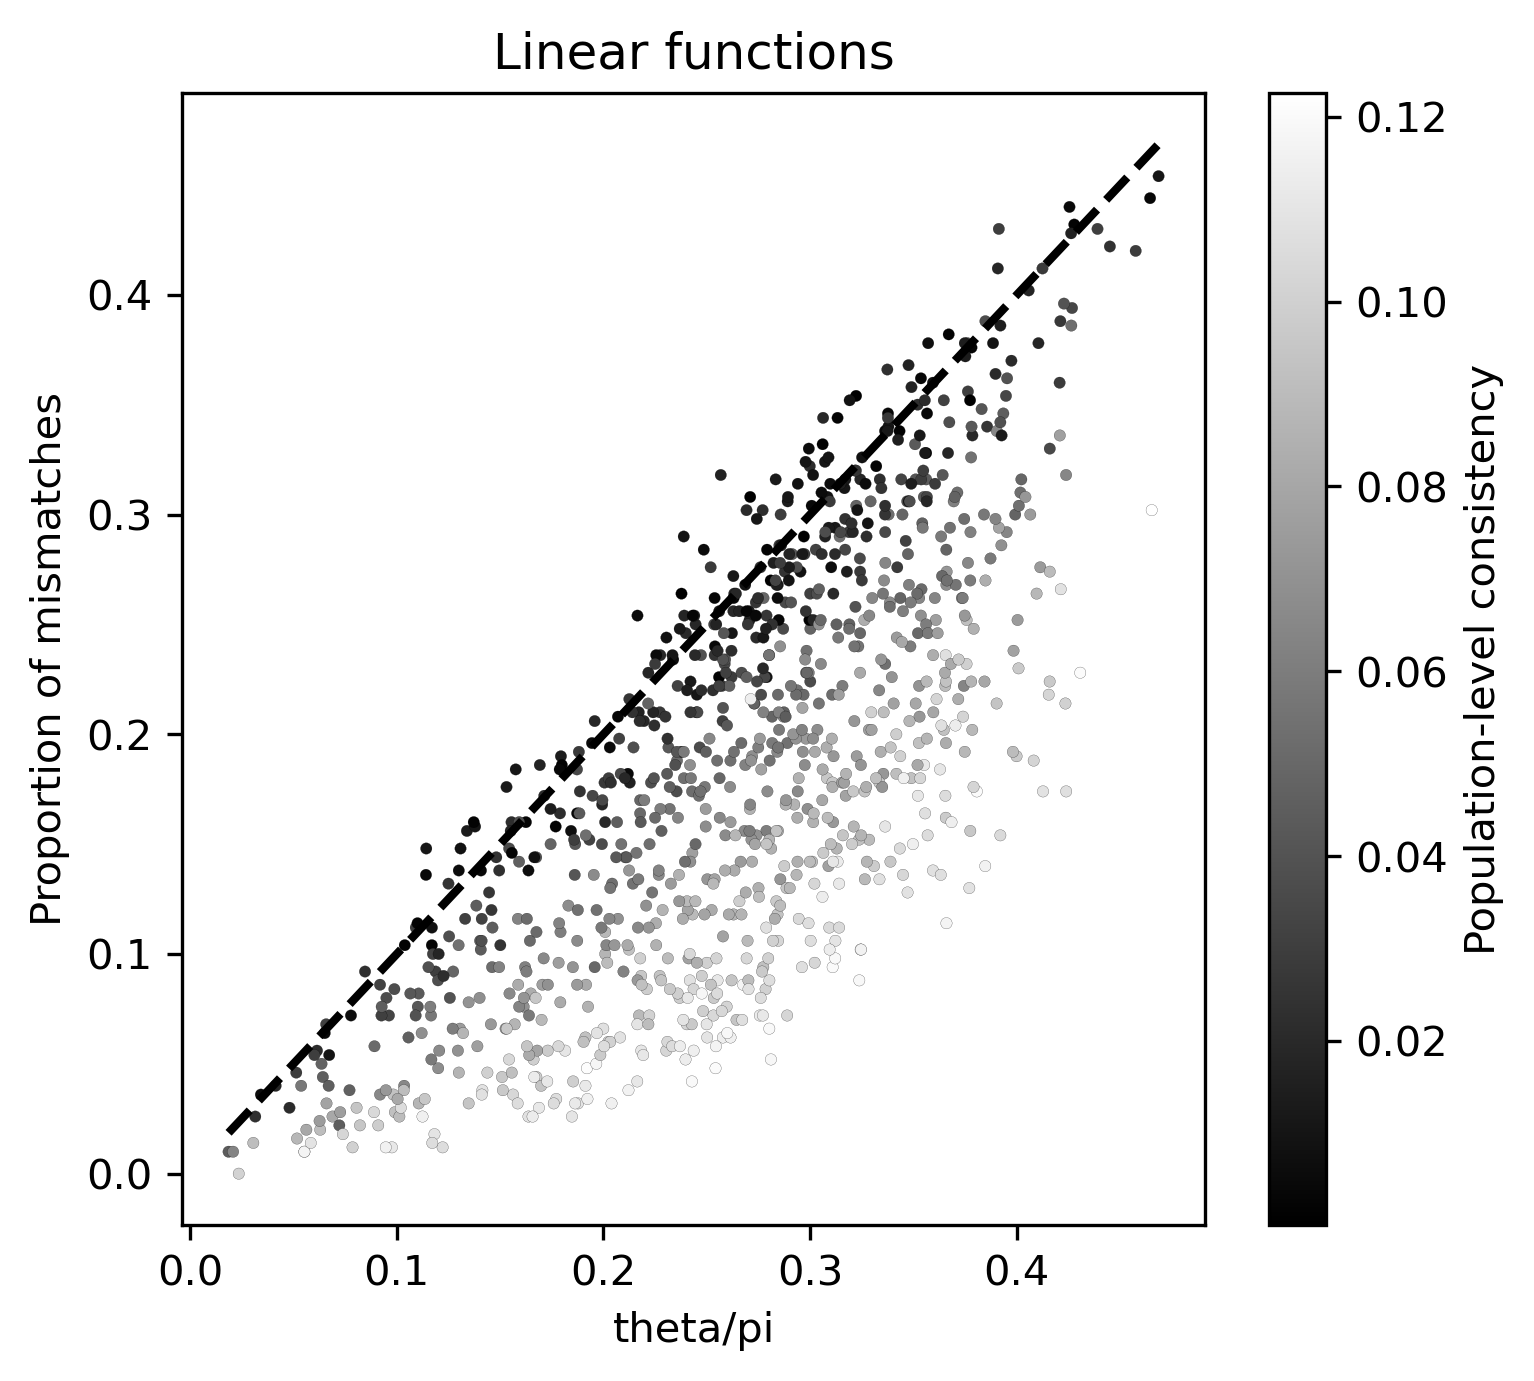

In [10]:
grad = [(0, 0, 0), (1, 1, 1)]
cmap = LinearSegmentedColormap.from_list("cmap", grad)

plt.figure(num=None, figsize=(5.5, 5), dpi=300, facecolor='w', edgecolor='k')

X = np.sort(ff_prediction)
plt.plot(X, X, 'k', lw=2, linestyle = '--', alpha = 1)
plt.scatter(ff_prediction, ff_realised, c = bias, s = 7.5, cmap = cmap, edgecolors='k', linewidths=0.05)
plt.xlabel("theta/pi")
plt.ylabel("Proportion of mismatches")
plt.colorbar(label="Population-level consistency")
plt.title(label="Linear functions");

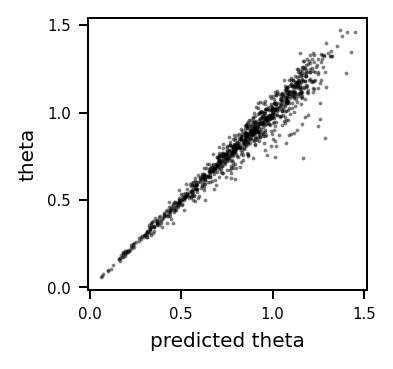

In [11]:
plt.figure(num=None, figsize=(2, 2), dpi=180, facecolor='w', edgecolor='k')


plt.scatter(ff_Theta_pred, ff_Theta, s = 2, edgecolors='k', linewidths=0.05, color = "k", alpha = 0.5)
plt.ylabel("theta", fontsize=8)
plt.xlabel("predicted theta", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=4);


- The proportion of mismatches between two linear (and positive) functions can be predicted using the angle between those functions divided by pi. This only holds true when the population-level non-additivity is unbiased - in other words, half the species respond synergistically and half the sepecies respond antagonistically. When there is a bias at the population level (due to whatever reason), there will be less mismatches between functions that predicted by their angles. Even a 60:40 split between antagonism and synergism will lead to an underestimation of the proportion of mismatches. This geometric effect can be easily visualised in 2D.

- The angle between the two functions can be predicted by measuring the diversity of the two functions, which is  far more easily accesible in empirical data than the precise angle itself. 

- With two of the three variables, 1. angle between functions, 2. mismatches between functions, and 3. population bias of non-additivity, we can say something about the third variable. Therefore, mismatches between functions can give us insights into the underlying population-level non-additivity.  

- When non-additivity is relative to biomass, we need to modify the angles between functions by modifying the functions themselves. 

- Stressor direction and stressor intensity (unless there are extinctions) have no effect here. If extinctions occur (negative stressors and high intensity) non-additivity will be very biased so the angle between functions will overestimate the actual proportion of mismatches.


<br>
<br>
<br>
<br>

## Figure 4 - Diversity  <a class="anchor" id="5"></a>
[Top](#1)

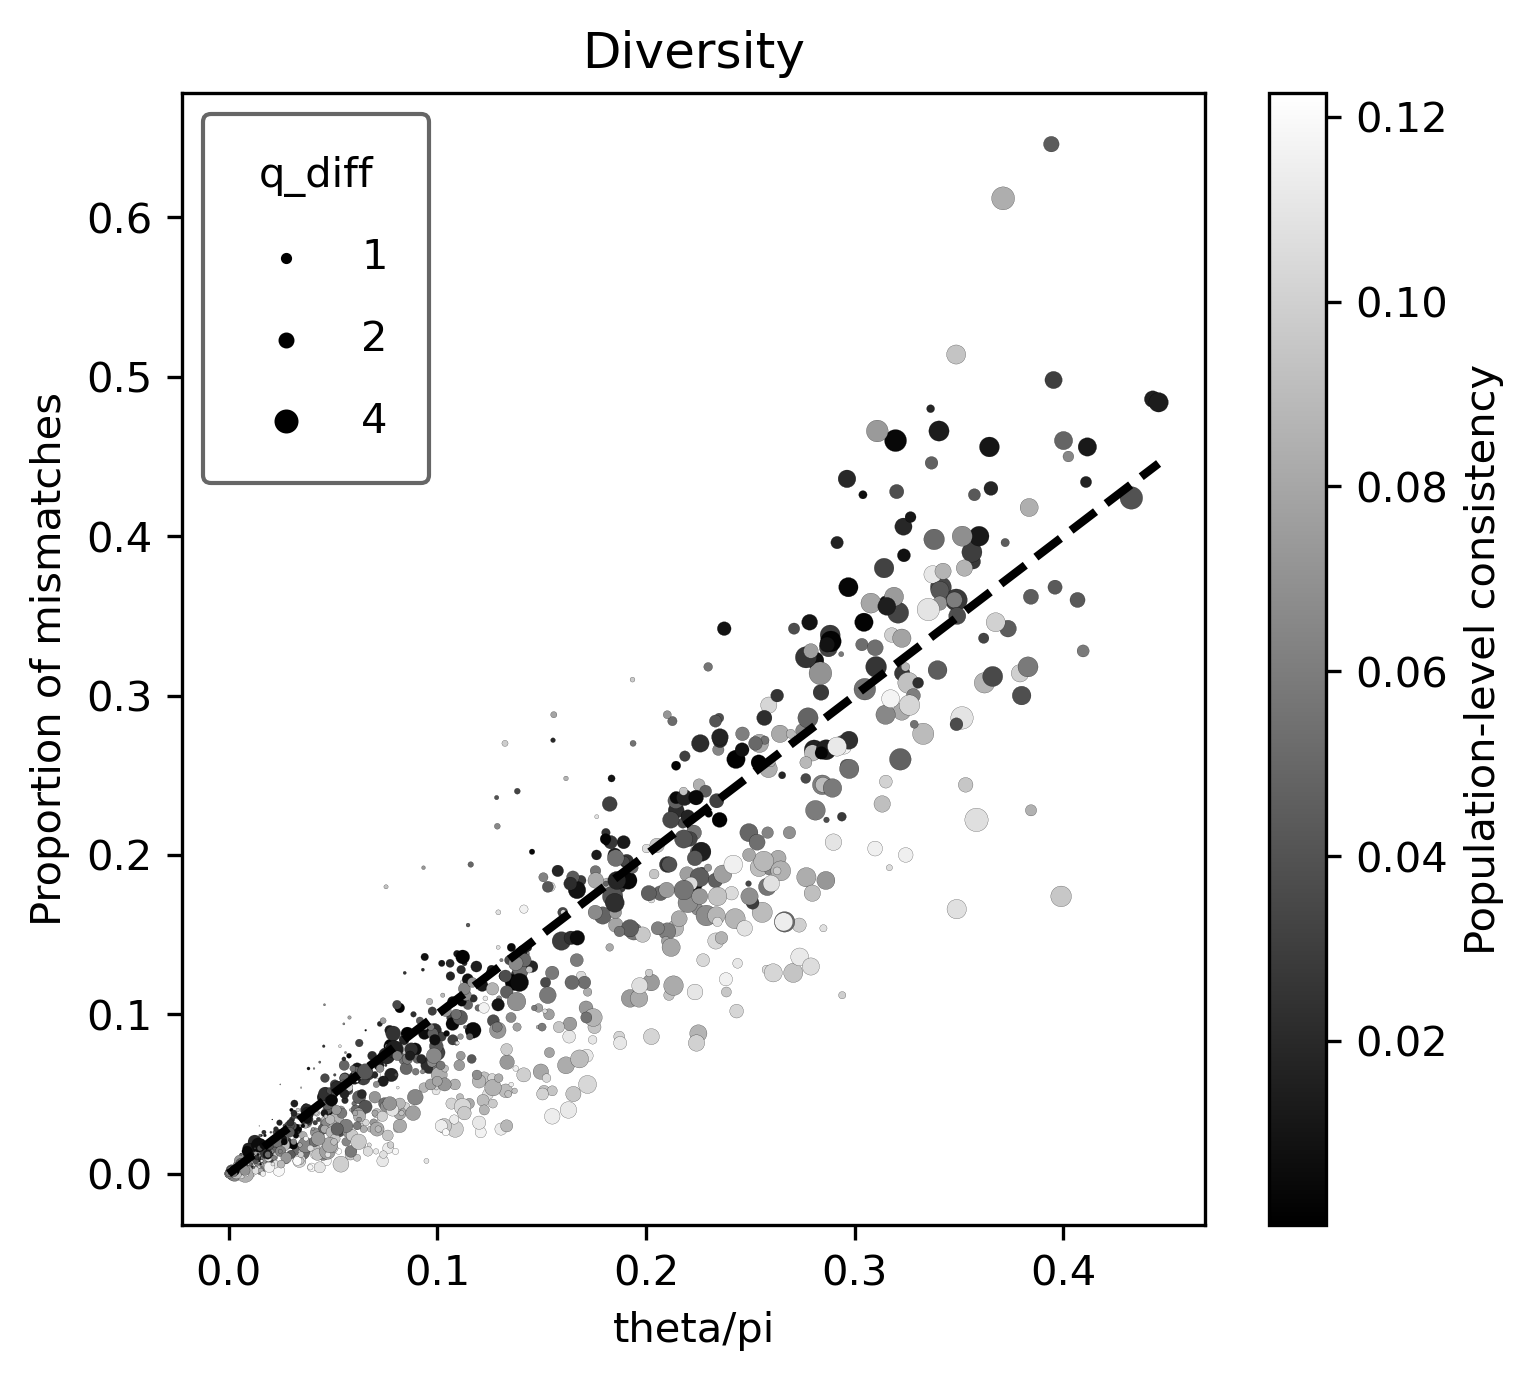

In [12]:
plt.figure(num=None, figsize=(5.5, 5), dpi=300, facecolor='w', edgecolor='k')

X = np.sort(dd_prediction)
plt.plot(X, X, 'k', lw=2, linestyle = '--', alpha = 1)
plt.scatter(dd_prediction, dd_realised, c = bias, s = (q_diff*2)**1.5,  
            cmap = cmap, edgecolors='k', linewidths=0.05)
plt.xlabel("theta/pi")
plt.ylabel("Proportion of mismatches")
plt.colorbar(label="Population-level consistency")
plt.title(label="Diversity");

ax = plt.gca()

#make a legend:
pws = [0, 1, 2, 4]
for pw in pws:
    plt.scatter([], [], s= (pw*2)**1.5, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], l[1:], labelspacing=1.0, title="q_diff", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w");

- Mismatches between the observations of diversity functions can be quite well explained by the angles between their gradients. The angles between these gradients increase as the difference between the q numbers of the diversity indices increases. 

- Interestingly, diversity gradients are actually very similar to positive functions, especially when evenness is low. When increases in the more dominant species will decrease diversity but all the others will increase diversity. On the other hand, when eveness is high, increases to most species will decrease diversity so there will be many negative components to the diversity gradient. 

- As these functions behave similarly to positive functions, the role of bias is similar - bias means that non-additivity is more likely to fall in the quadrants that are purely positive or purely negativem, which for postive functions, is exactly where the cone of mismatches isn't! There will be a systematic overestimation of the proportion of mismatches. 

- When non-additivity is proportional to biomass, then the most non-additivity is focused on the negative components of the diversity gradients! This means that the bias will not have the same effect that it had for positive functions. So multiplying non-add by K hides the effect of bias. 

<br>
<br>
<br>
<br>

## Figure 5 - Biomass-Diversity  <a class="anchor" id="6"></a>
[Top](#1)

In [13]:
num_funs = 1000
num_exp = 500
S = 50                                                           

# Key parameters 
sI_d = 0           # stressor direction
sI_i = 0.1         # stressor intensity
nonadd_d = 0.3     # non-additivity bias
nonadd_i = 0.1     # non-additivity intensity
alpha_low = 0      # scaling (lower end of random normal for scaling non-add by biomass)
alpha_high = 1     # scaling (upper end of random normal for scaling non-add by biomass)

ff_prediction, ff_prediction_div, dd_prediction, bd_prediction, ff_realised, dd_realised, bd_realised, bias, q_diff, Unevenness, diversity, scaling, ff_Theta, ff_Theta_pred = generic_model(num_funs, num_exp, S, sI_d, sI_i, nonadd_d, nonadd_i, alpha_low, alpha_high)

0
100
200
300
400
500
600
700
800
900
done


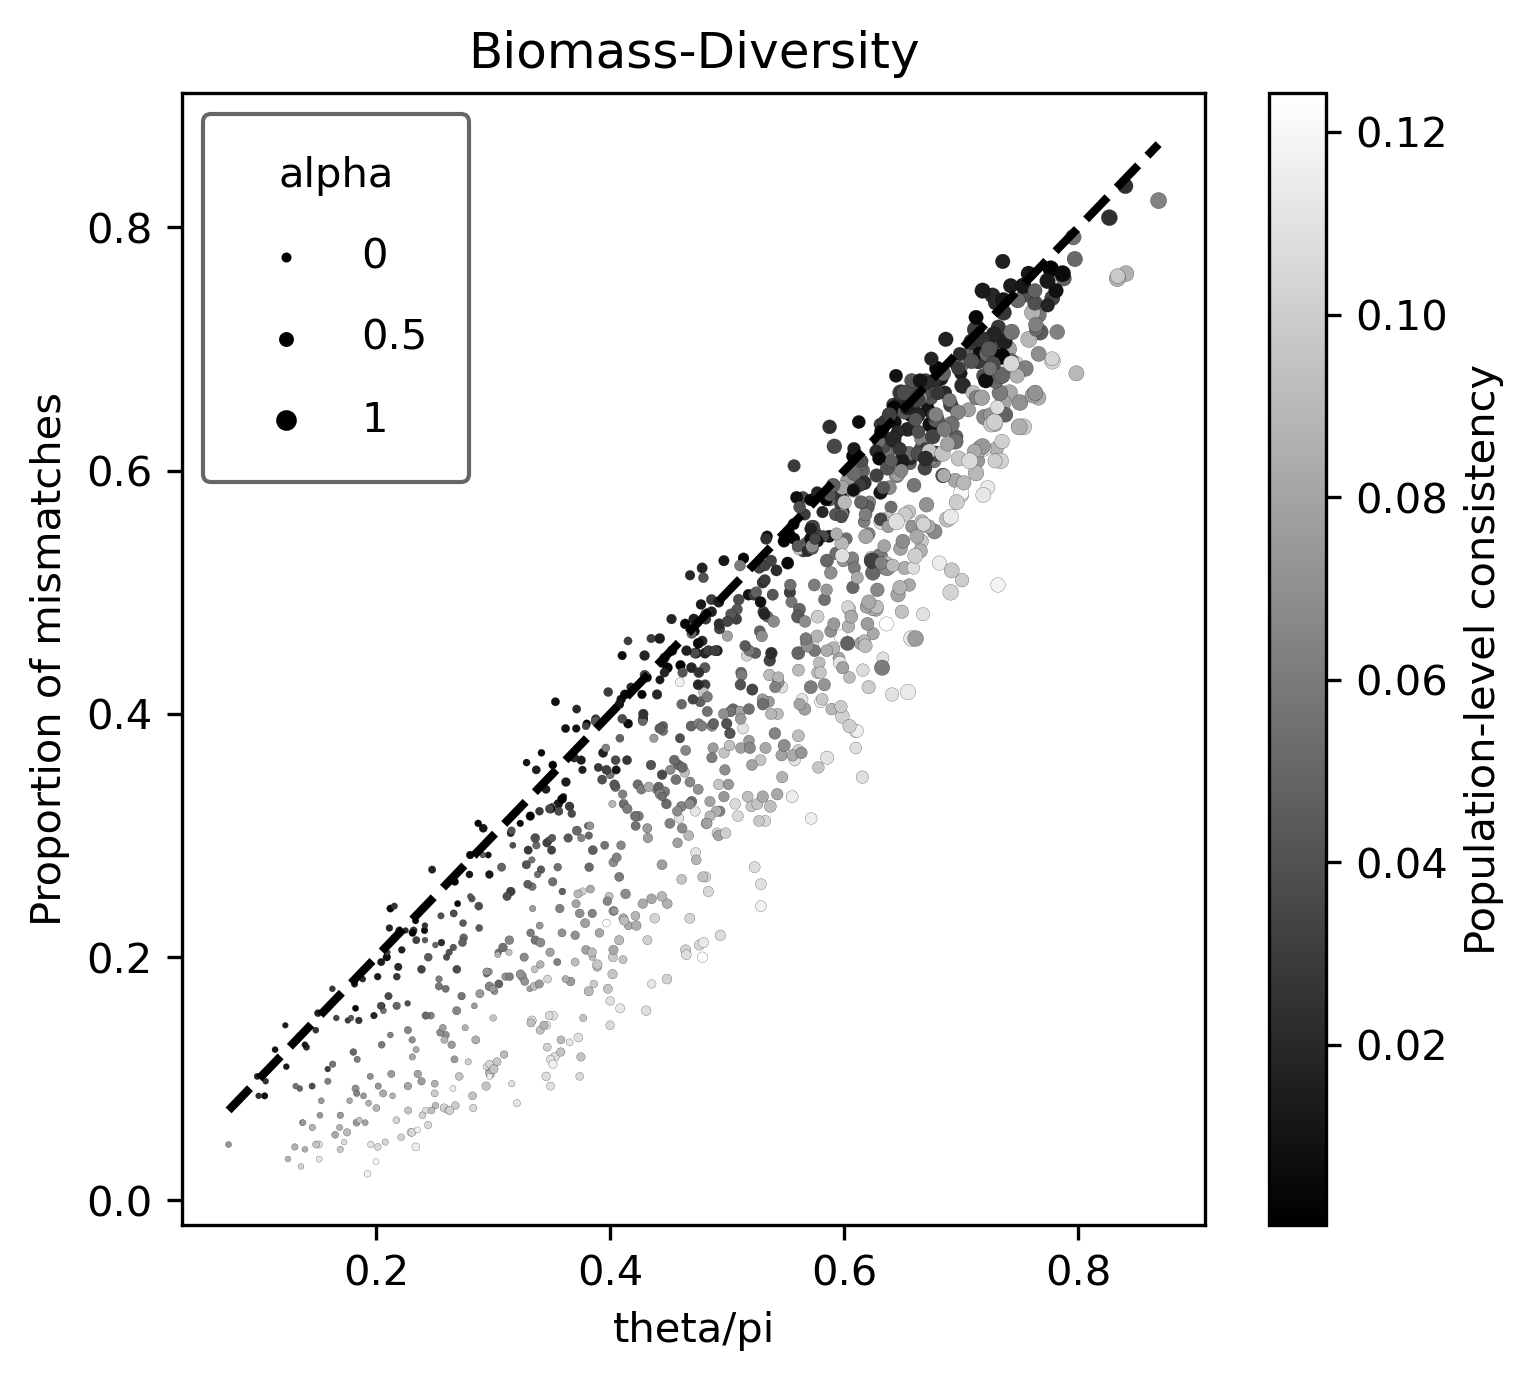

In [14]:
plt.figure(num=None, figsize=(5.5, 5), dpi=300, facecolor='w', edgecolor='k')

X = np.sort(bd_prediction)
plt.plot(X, X, 'k', lw=2, linestyle = '--', alpha = 1)
plt.scatter(bd_prediction, bd_realised, c = bias, s = ((1+scaling)*1.25)**3,  
            cmap = cmap, edgecolors='k', linewidths=0.05)
plt.xlabel("theta/pi")
plt.ylabel("Proportion of mismatches")
plt.colorbar(label="Population-level consistency")
plt.title(label="Biomass-Diversity");

ax = plt.gca()

#make a legend:
pws = [0, 0, 0.5, 1]
for pw in pws:
    plt.scatter([], [], s = ((1+pw)*1.25)**3, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], l[1:], labelspacing=1.0, title="alpha", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w");

#plt.axhline(y=0.5, color='r', linestyle='-', alpha =0.2, lw=4);

- Looking at the mismatches between biomass and diversity is very revealing. It actually illuminates another piece of the puzzle, another piece of information about the non-additivity at the population level that is relevant the mismatches of observations at the community level: the scaling of non-additivity by the biomass of species. 

- It is important to modify the function (total biomass) and the diversity gradient by multiplying by K^alpha to get the most informative angle. When you don't do this, there is quite a lot of weirdness (funnel effects), related to the eveness of the community and the non-linearity of the diversity function. 

- When non-additivity is relative to biomass, it means that diversity will be very much acting like a negative function. When you compare the negative function with the positive function of total biomass, we see that the angle between the diversity gradient and linear function can exceed 90 degrees! This means that when non-additivity is unbaised there will be systematic mismatches. We can go above 0.5 (which is what we had originally seen in the empirical data). 

- Alpha, how much non-additivity is scaled by biomass, does a very good job oof predicting the angle between biomass and diversity (seen by the gradient of the size of the points). The effect of bias can still be seen nicely.


<br>
<br>
<br>
<br>

## Reproducing empirical results  <a class="anchor" id="7"></a>
[Top](#1)

In [15]:
num_exp = 1000 
S = 50
sI_d = 0
sI_i = 0.1
nonadd_i = 0.1
nonadd_d = 0
nonadd_bias = 0

# vectors to fill in 
syn_biomass = np.zeros(num_exp)
syn_diversity = np.zeros(num_exp)
mismatch = np.zeros(num_exp)
bd_prediction = np.zeros(num_exp)

# Loop to run stressor experiments for each community 
for m in range(num_exp): 
    
    ########## Generate Stressors ##########
    
    # generate scaling
    alpha = np.random.uniform(0.75, 1)
    
    # generate community 
    zeta = np.random.uniform(1.5, 2.5)      # unevenness
    K = np.exp(np.random.normal(0, zeta, size=S))    
    Nf = np.maximum(K, 0)
    P = K/np.sum(K)

    # generate total biomass 
    total = np.ones(S) 
    total_mod = (K**alpha) * total
    
    # Generate diversity 
    q = np.random.uniform(0.01, 2)
    d_grad = (np.power(P, q-1) - np.sum(np.power(P, q))) * (q/(1-q))
    d_grad_mod = (K**alpha) * d_grad

    # Stressor 1 
    s1 = np.random.normal(sI_d, 1, size=S)      
    s1 = s1/norm(s1)                           
    s1_int = np.random.uniform(0, sI_i)        
    s1 = s1 * s1_int * (K**alpha)             
    s1 = s1 * np.sqrt(S)                       

    # Stressor 2 
    s2 = np.random.normal(sI_d, 1, size=S)                       
    s2 = s2/norm(s2)                            
    s2_int = np.random.uniform(0, sI_i)     
    s2 = s2 * s2_int * K              
    s2 = s2 * np.sqrt(S)

    # Non-additive term 
    nonadd = np.random.normal(nonadd_bias, 1, size = S) 
    nonadd = nonadd/norm(nonadd) 
    nonadd_int = np.random.uniform(0, nonadd_i) 
    nonadd = nonadd * nonadd_int * (K**alpha)     
    nonadd = nonadd * np.sqrt(S)

    # Combination 
    s12 = s1 + s2 + nonadd

    ########## Apply Stressors ##########       
    NS_1 = np.maximum((K - s1), 0)
    NS_2 = np.maximum((K - s2), 0)
    NS_12 = np.maximum((K - s12), 0)

    # Effect of stressors (at population level)
    DS_1 = NS_1 - Nf
    DS_2 = NS_2 - Nf
    DS_12 = NS_12 - Nf
                    
    # Diversity synergism    
    D_1 = hill(NS_1, q) - hill(Nf, q)
    D_2 = hill(NS_2, q) - hill(Nf, q)
    D_12 = hill(NS_12, q) - hill(Nf, q)
    syn_D = D_12 - (D_1 + D_2)
    syn_diversity[m] = syn_D           

    # Total Biomass  
    T_1 = sum(NS_1) - sum(Nf) 
    T_2 = sum(NS_2) - sum(Nf) 
    T_12 = sum(NS_12) - sum(Nf) 
    syn_T = T_12 - (T_1 + T_2)
    syn_biomass[m] = syn_T
    
    # Mismatches
    mismatch[m] = is_mismatched(syn_D, syn_T)  # 1 is mismatch, 0 if same sign


0.738


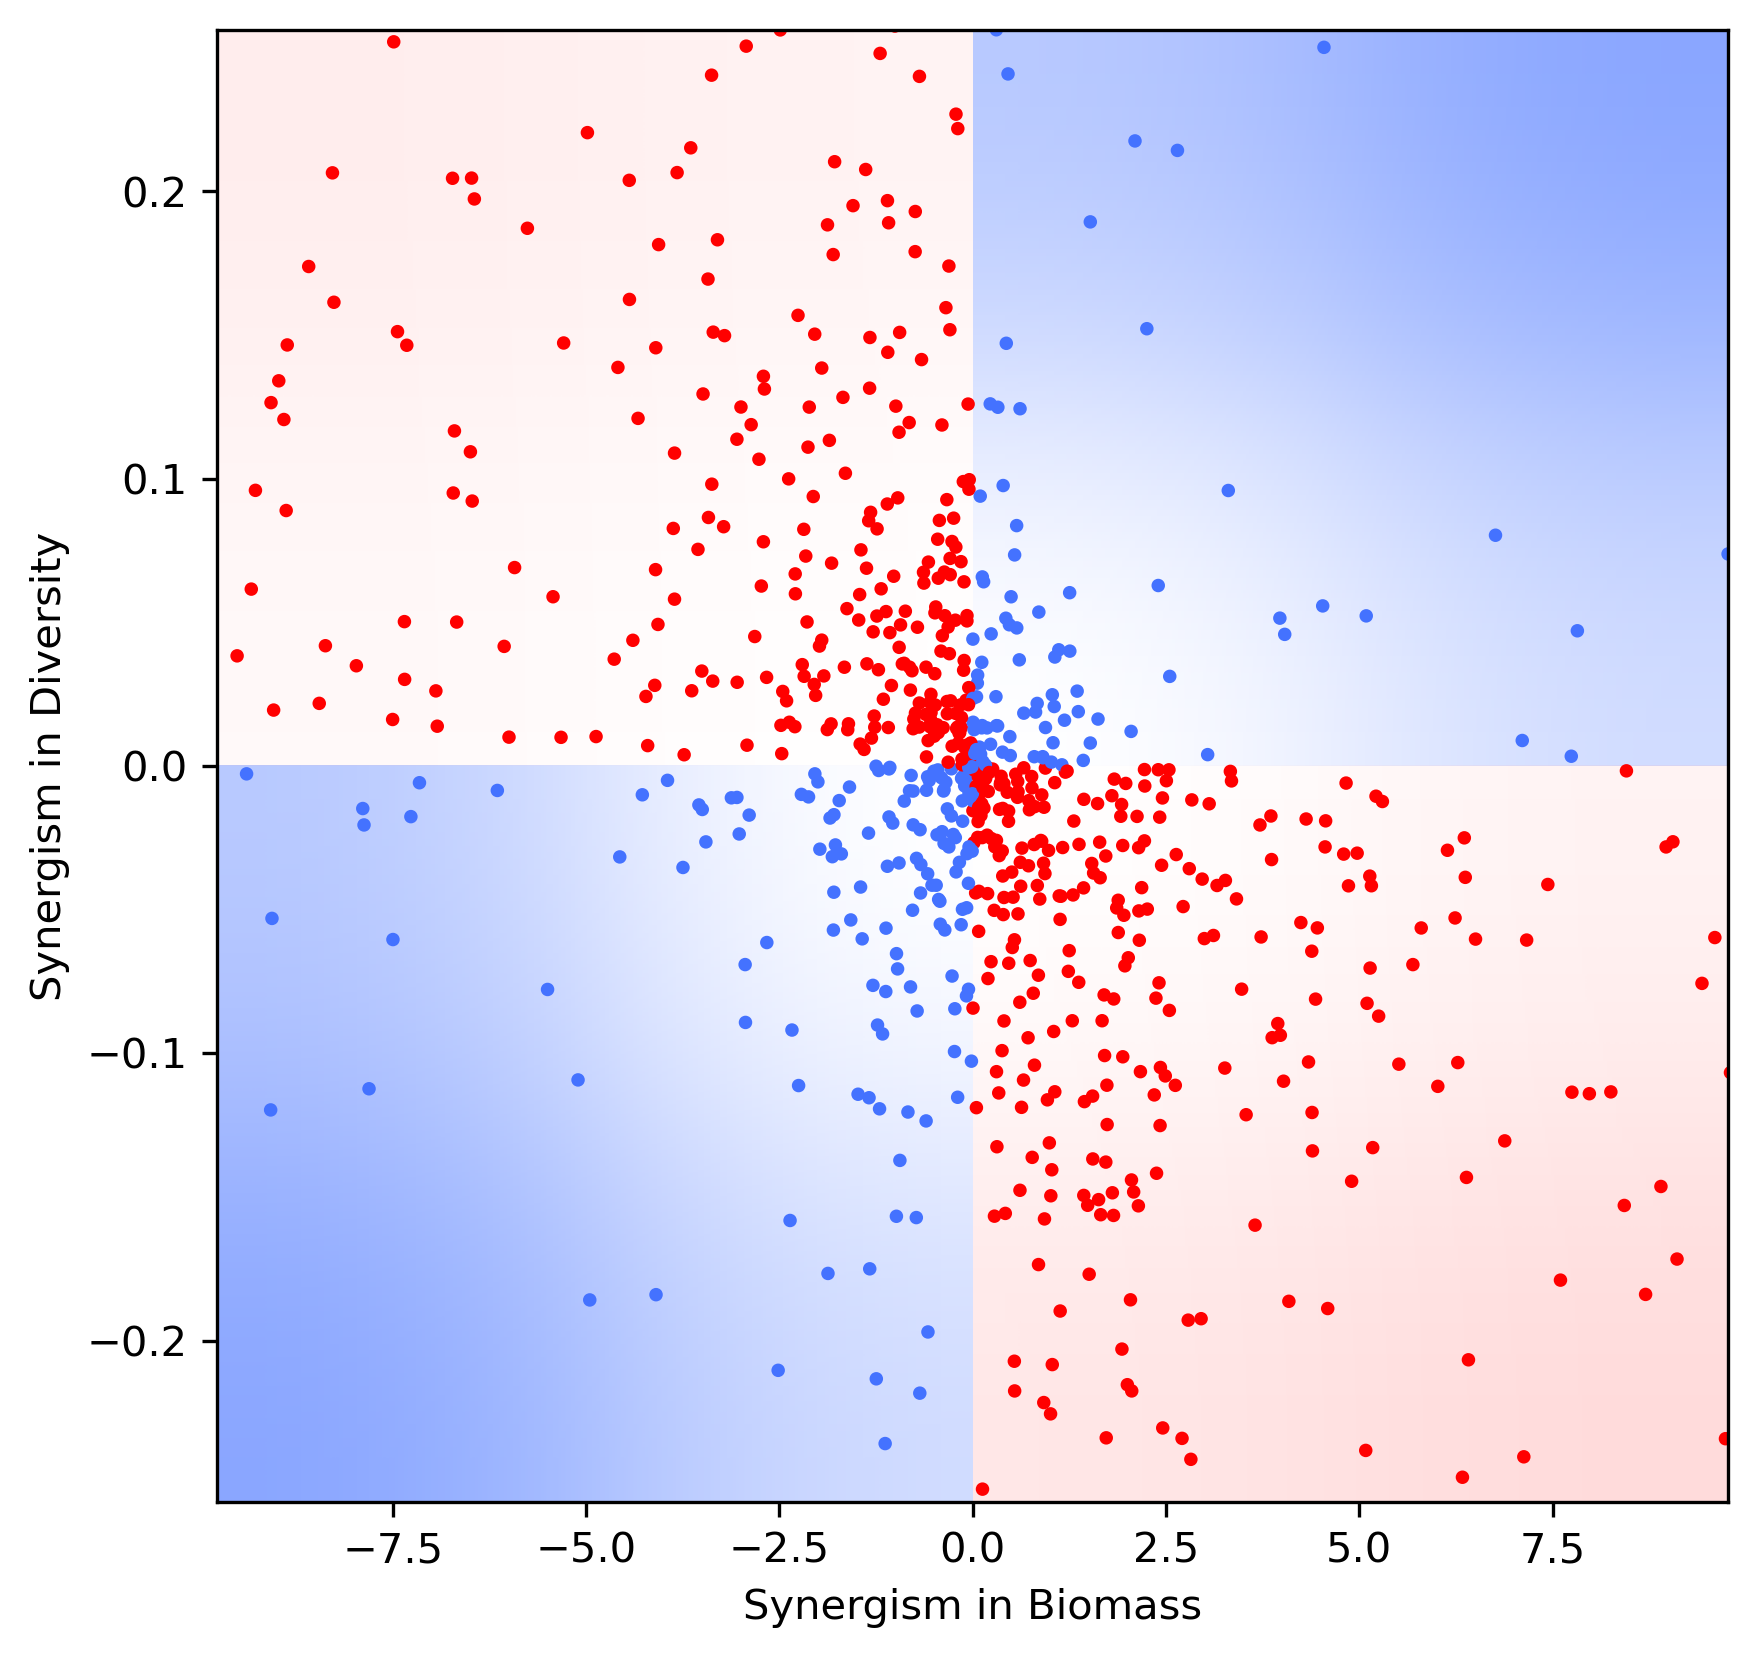

In [16]:
grad = [j_blue, "red"]
cmap = LinearSegmentedColormap.from_list("cmap", grad)

plt.figure(num=None, figsize=(6.5, 6.5), dpi=300, facecolor='w', edgecolor='k')


# Biomass v Diversity
Max_X = np.percentile(syn_biomass, 95) #max(syn_biomass)
Max_Y = np.percentile(syn_diversity, 95) #max(syn_diversity)


plt.scatter(syn_biomass, syn_diversity,
           s=5, c=mismatch, cmap = cmap)
plt.xlim(-Max_X, Max_X)
plt.ylim(-Max_Y, Max_Y)


plt.imshow([[1.,1.], [0.,0.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.5,
            extent = (0, Max_X, 0, Max_Y))   
plt.imshow([[0.,1.], [0.,1.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.25,
            extent = (0, Max_X, 0, Max_Y))      
plt.imshow([[0.,1.], [0.,1.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.5,
            extent = (0, -Max_X, 0, -Max_Y))   
plt.imshow([[1.,1.], [0.,0.]],
            cmap = blue_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.25,
            extent = (0, -Max_X, 0, -Max_Y)) 
plt.imshow([[1.,1.], [0.,0.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.1,
            extent = (0, Max_X, 0, -Max_Y)) 
plt.imshow([[0.,1.], [0.,1.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.05,
            extent = (0, Max_X, 0, -Max_Y)) 
plt.imshow([[1.,1.], [0.,0.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.05,
            extent = (0, -Max_X, 0, Max_Y)) 
plt.imshow([[0.,1.], [0.,1.]],
            cmap = red_cmap, 
            interpolation = 'quadric',
            aspect = 'auto',
            alpha = 0.025,
            extent = (0, -Max_X, 0, Max_Y));  

print(np.sum(mismatch)/len(mismatch)) # Proportion of mismatch

plt.xlabel("Synergism in Biomass")
plt.ylabel("Synergism in Diversity");


Randomly generated stressors, randomly generated community, randomly generated diversity between richness and simpsons. Alpha between 0.75 and 1. 

<br>
<br>
<br>
<br>

## Sup Figure - Visualising diversity  <a class="anchor" id="8"></a>
[Top](#1)

In [17]:
x = np.linspace(1, 100, 100)
y = np.linspace(1, 100, 100)
X, Y = np.meshgrid(x, y)
Y = np.flip(Y)
joint = np.stack((X,Y),axis=2)

def rows(c, q):
    row = np.zeros(len(x))
    for r in x:
        r = round(r)
        i = r-1
        j = c-1
        row[i] = hill(joint[i, j], q)
    return row

def heatmap(q): 
    table = np.zeros([len(x), len(x)])
    for c in x: 
        c = round(c)
        i = c-1
        table[:, i] = rows(i+1, q)
    return table


q_2 = heatmap(2.0)

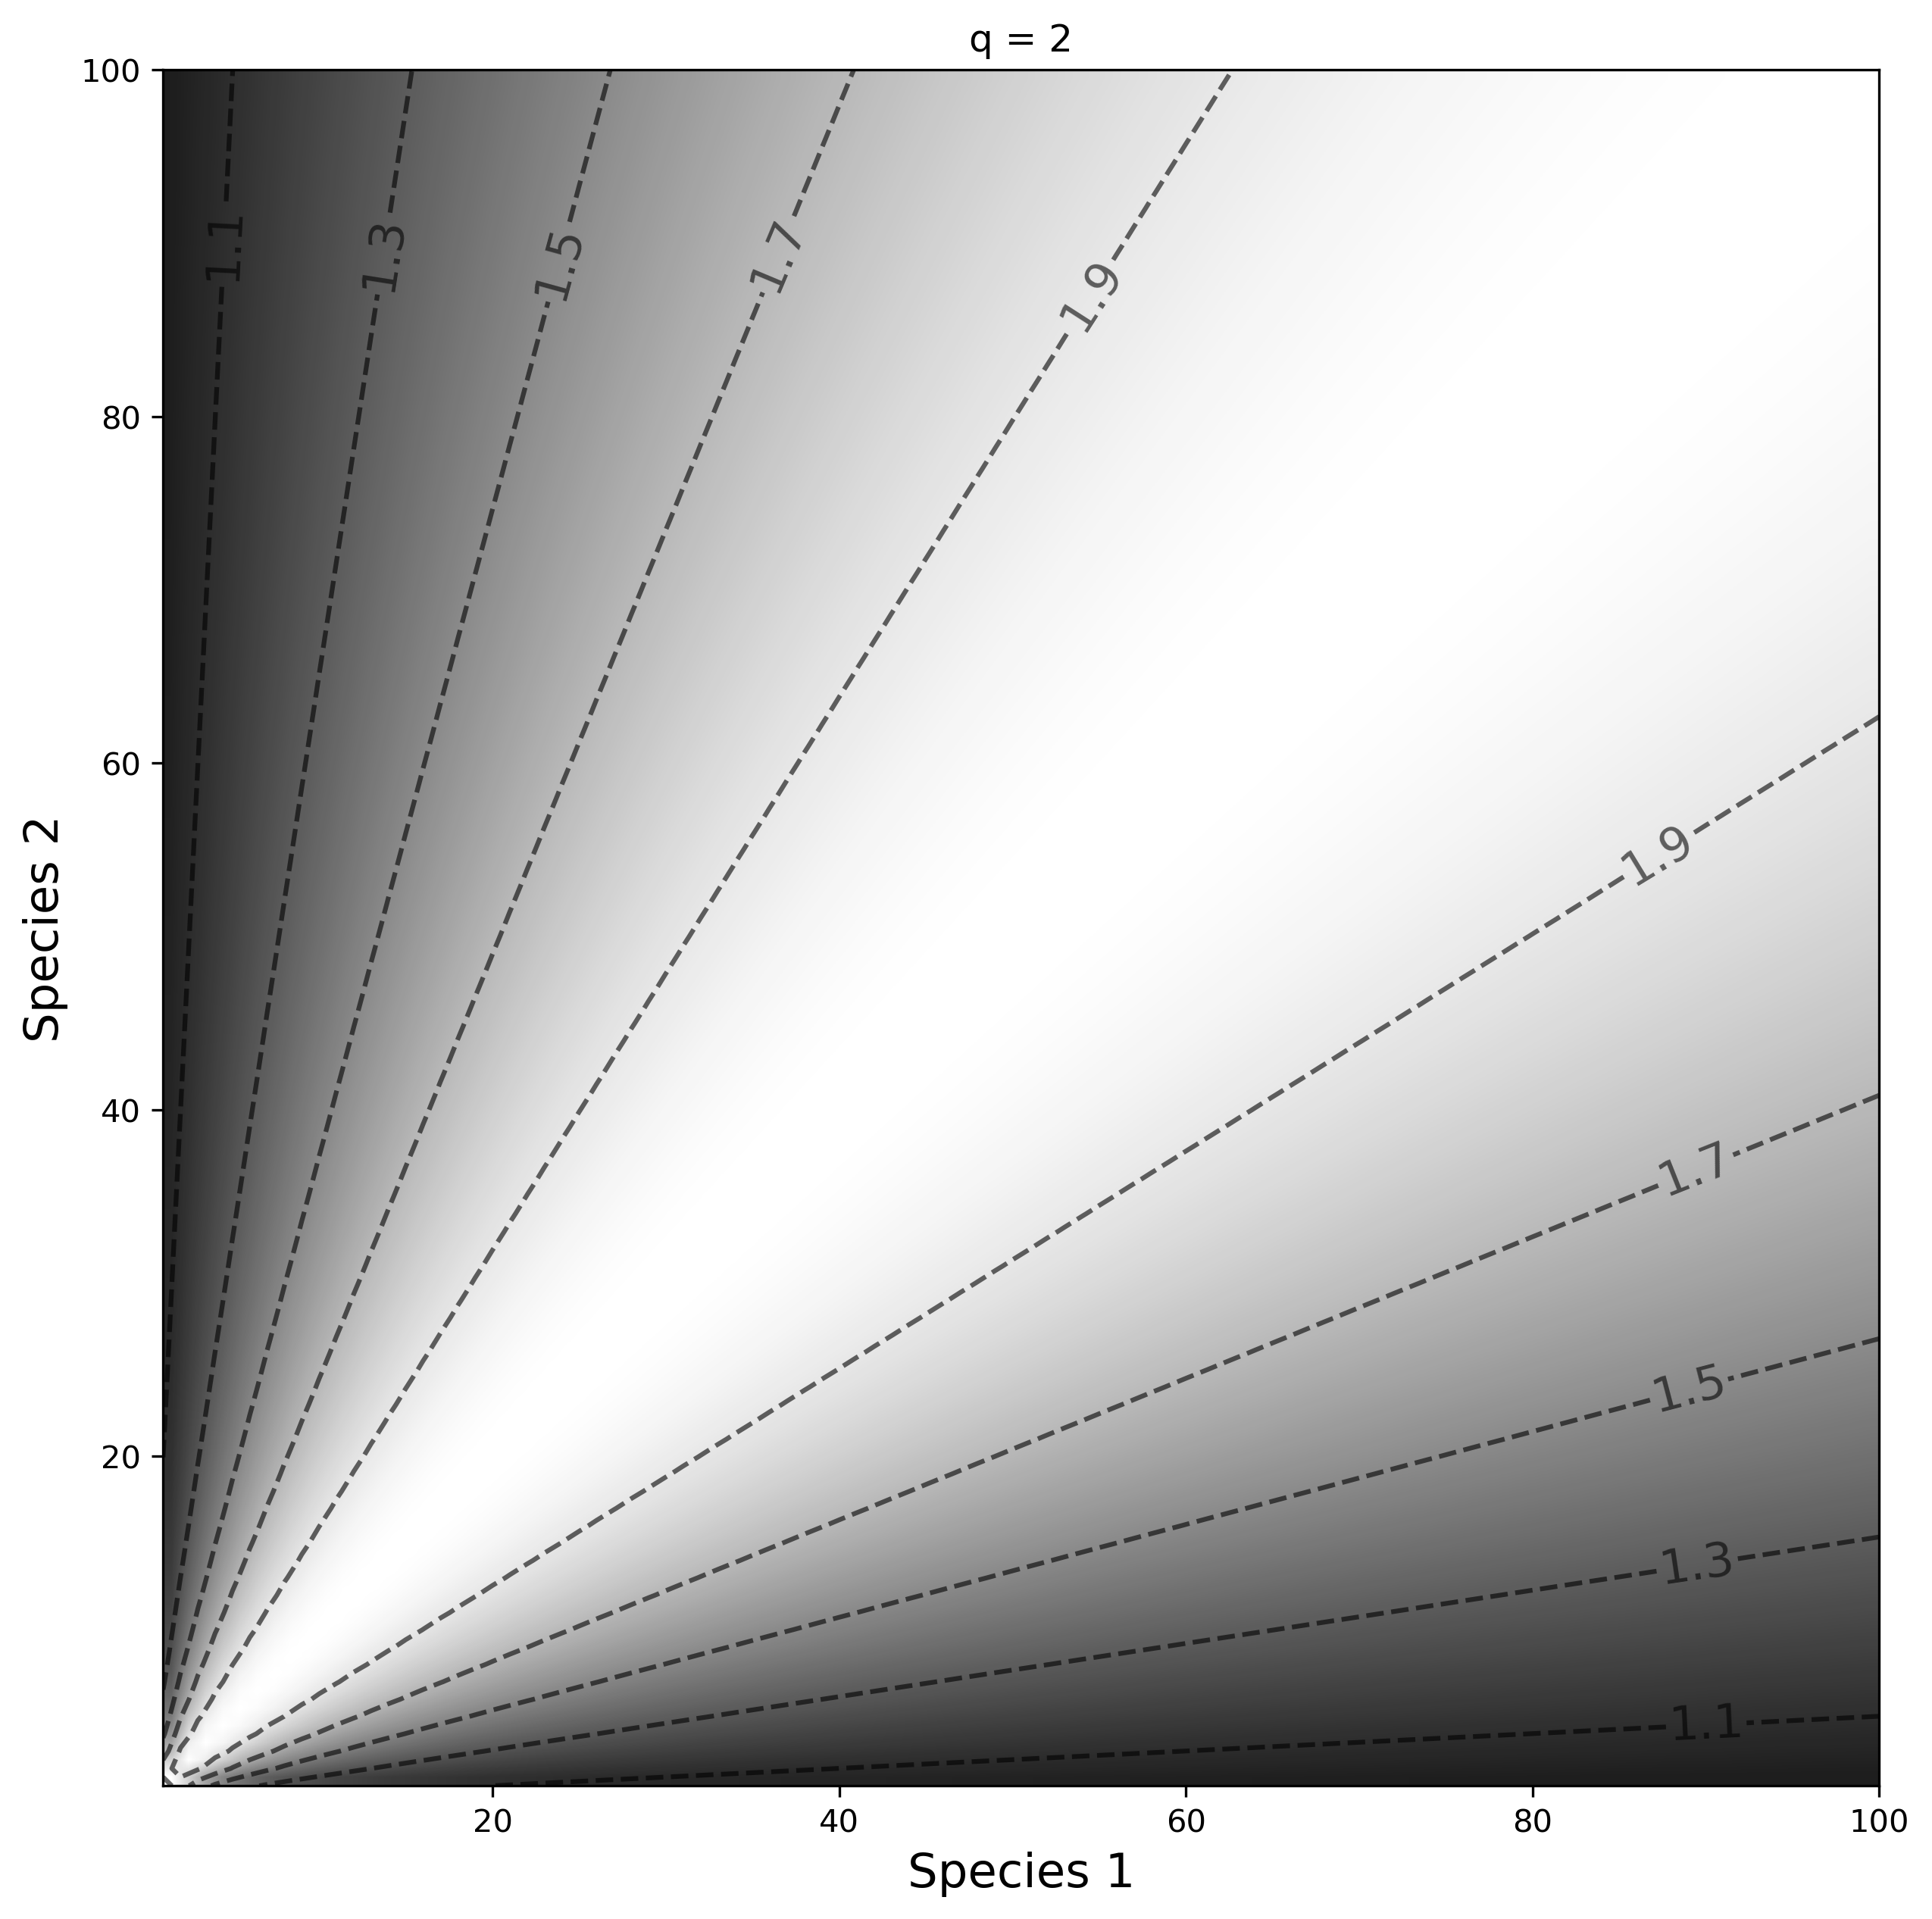

In [19]:
grad = [(0.1, 0.1, 0.1), (1, 1, 1)]
cmap = LinearSegmentedColormap.from_list("cmap", grad)

locations = [(5, 90),
             (10, 90), 
             (20, 90), 
             (35, 90),
             (50, 90),
             (90, 50),
             (90, 35), 
             (90, 20), 
             (90, 10),
             (90, 5)]

plt.figure(num=None, figsize=(10, 10), dpi=300, facecolor='w', edgecolor='k')

image = plt.imshow(q_2, cmap=cmap, extent=(1, 100, 1, 100), interpolation='bilinear', vmin=1, vmax=2) 
#plt.colorbar()
plt.xlabel("Species 1", fontsize=15)
plt.ylabel("Species 2", fontsize=15)
plt.title("q = 2")
con = plt.contour(X, Y, q_2, colors='black', linestyles='dashed', alpha = 0.6, levels = [1.1, 1.3, 1.5, 1.7, 1.9])
plt.clabel(con, inline=True, fontsize=15, fmt = '%1.1f', manual = locations)
plt.show();